### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [7]:
from sklearn.preprocessing import StandardScaler

In [26]:
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# X = boston_dataset.data
# y = boston_dataset.target

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data = StandardScaler().fit_transform(data)
X = data[:, :13]
y = data[:, 13].ravel()



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


Iteration break at step 419.0000, r2 score = 0.6690


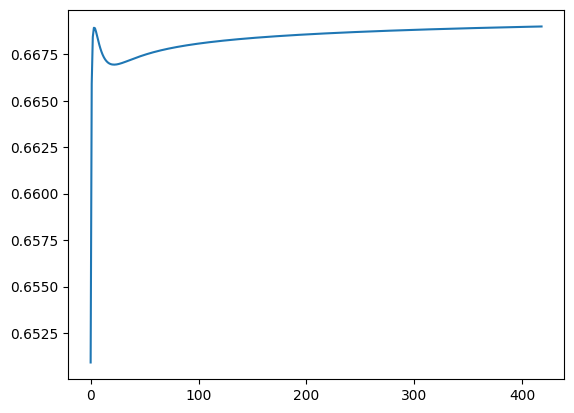

In [42]:
r2_target = 0.669
w_evolution, r2_evolution = [], []
sgd_model = SGDRegressor(eta0=0.015, fit_intercept=True, random_state=42)

for step in range(800):
  sgd_model = sgd_model.partial_fit(X_train, y_train)
  r2_temp = r2_score(y_valid, sgd_model.predict(X_valid)).copy()

  if r2_temp > r2_target:
    print('Iteration break at step %.4f, r2 score = %.4f' % (step, r2_temp)); break
  r2_evolution.append(r2_temp)

plt.plot(range(step), r2_evolution)
plt.show()

In [28]:
round(max(r2_evolution))

1

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.